## Summary

<p>
In this project models based on the k-nearest neighbors algorithm (KNN) and models based on neural networks of type multi layer perceptron (MLP) are developed and applied to the     
<a href="  https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html">digits dataset (classification)</a>. Each datapoint is a 8x8 image of a digit. The goal is to recognize the images of the hand-written digits. Also a support vector machine base model is built. 
</p> 

<p>
The models are evaluated with the accuracy-metric.
</p> 

<p>
Some of techniques applied here are:
</p> 

 <ul>
  <li>data visualization</li>
  <li>train-test-splits</li>
  <li>KFold cross-validation</li>
  <li>Feedforward neural network</li>
  <li>KNeighborsClassifier</li>
  <li>multi layer perceptron classifiers (MLPClassifier)</li>
  <li>hyperparameter tuning</li>
  <li>scaling</li> 
  <li>support vector machines</li>
    
    
</ul>

## Import packages

In [826]:
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pyplot import cm
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

plt.rcParams['font.size'] = 11
plt.rcParams['font.style'] = 'italic'
plt.rcParams['font.family'] = 'monospace'

import numpy as np
print("numpy version: ", np.__version__)
import scipy.stats
import math
import os
import types

import sklearn
print("SKlearn version: ", sklearn.__version__)
from sklearn.datasets import load_digits
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn import svm, metrics



numpy version:  1.16.2
SKlearn version:  0.20.3


## Import data

In [827]:
# Load and return the digits dataset (classification).
digits = load_digits()

## Explore data

In [828]:
print(type(digits))

<class 'sklearn.utils.Bunch'>


In [829]:
print(digits.keys())

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])


In [830]:
print(digits.data.shape)
print(type(digits.data))
print(digits.target.shape)
print(type(digits.target))

(1797, 64)
<class 'numpy.ndarray'>
(1797,)
<class 'numpy.ndarray'>


In [831]:
print(digits.target_names)

[0 1 2 3 4 5 6 7 8 9]


In [832]:
print(digits.images.shape)
print(digits.images[:1])

(1797, 8, 8)
[[[ 0.  0.  5. 13.  9.  1.  0.  0.]
  [ 0.  0. 13. 15. 10. 15.  5.  0.]
  [ 0.  3. 15.  2.  0. 11.  8.  0.]
  [ 0.  4. 12.  0.  0.  8.  8.  0.]
  [ 0.  5.  8.  0.  0.  9.  8.  0.]
  [ 0.  4. 11.  0.  1. 12.  7.  0.]
  [ 0.  2. 14.  5. 10. 12.  0.  0.]
  [ 0.  0.  6. 13. 10.  0.  0.  0.]]]


In [833]:
print(digits.DESCR[:300])

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Miss


#### Looking at selected images

<Figure size 432x288 with 0 Axes>

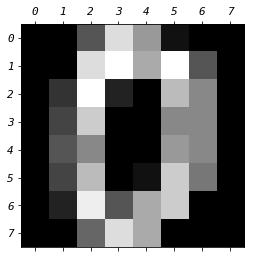

In [834]:
plt.gray() 
plt.matshow(digits.images[0]) 
plt.show() 

<Figure size 432x288 with 0 Axes>

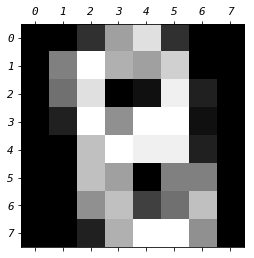

In [835]:
plt.gray() 
plt.matshow(digits.images[500]) 
plt.show()

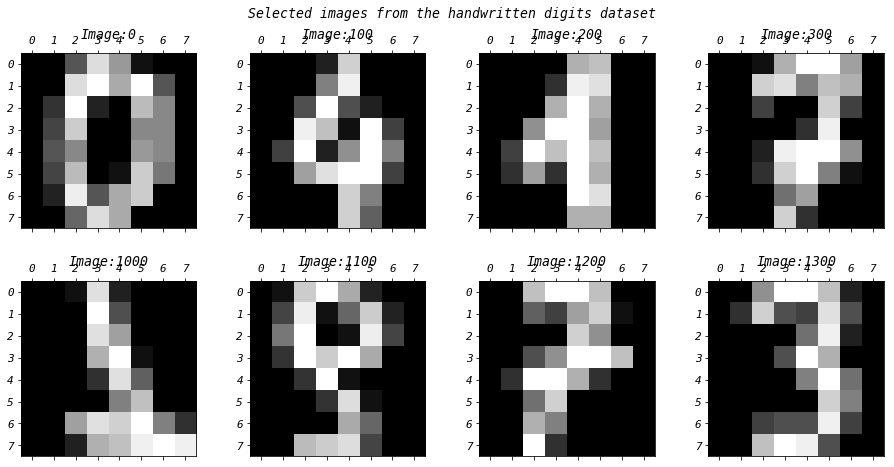

In [836]:
# image are stored as rows, the columns or features are pixels of the image
# the image is built from a array of pixels

selection_images = [0, 100, 200, 300, 1000, 1100, 1200, 1300] 

rows =    [0,0,0,0,1,1,1,1]
columns = [0,1,2,3,0,1,2,3]

fig, ax = plt.subplots(2,4, figsize=(15,8), 
                       gridspec_kw=dict(left=0.1, right=0.9,
                                        bottom=0.2, top=0.9))
plt.subplots_adjust(wspace=0.3, hspace=0.3)
plt.suptitle("Selected images from the handwritten digits dataset")

for i,k,d in zip(rows, columns, selection_images):
    plt.gray() 
    ax[i,k].matshow(digits.images[d]) 
    ax[i,k].set_title("Image:{}".format(d))
plt.show()
    


##### Feature values

In [837]:
data_df = pd.DataFrame(digits.data)

print(data_df.shape)
print(data_df.columns)
print(data_df.head())
print(data_df.info(verbose=False))

(1797, 64)
RangeIndex(start=0, stop=64, step=1)
    0    1    2     3     4     5    6    7    8    9   ...   54   55   56  \
0  0.0  0.0  5.0  13.0   9.0   1.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
1  0.0  0.0  0.0  12.0  13.0   5.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
2  0.0  0.0  0.0   4.0  15.0  12.0  0.0  0.0  0.0  0.0  ...  5.0  0.0  0.0   
3  0.0  0.0  7.0  15.0  13.0   1.0  0.0  0.0  0.0  8.0  ...  9.0  0.0  0.0   
4  0.0  0.0  0.0   1.0  11.0   0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   

    57   58    59    60    61   62   63  
0  0.0  6.0  13.0  10.0   0.0  0.0  0.0  
1  0.0  0.0  11.0  16.0  10.0  0.0  0.0  
2  0.0  0.0   3.0  11.0  16.0  9.0  0.0  
3  0.0  7.0  13.0  13.0   9.0  0.0  0.0  
4  0.0  0.0   2.0  16.0   4.0  0.0  0.0  

[5 rows x 64 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1797 entries, 0 to 1796
Columns: 64 entries, 0 to 63
dtypes: float64(64)
memory usage: 898.6 KB
None


<b>Looking at the distributions</b>

(array([35.,  5.,  1.,  4.,  4.,  2.,  4.,  2.,  2.,  5.]),
 array([ 0. ,  1.6,  3.2,  4.8,  6.4,  8. ,  9.6, 11.2, 12.8, 14.4, 16. ]),
 <a list of 10 Patch objects>)

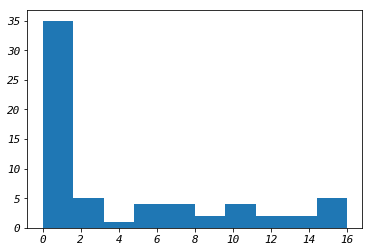

In [838]:
plt.hist(data_df.iloc[1400])

(array([37.,  6.,  1.,  0.,  1.,  1.,  0.,  2.,  6., 10.]),
 array([ 0. ,  1.6,  3.2,  4.8,  6.4,  8. ,  9.6, 11.2, 12.8, 14.4, 16. ]),
 <a list of 10 Patch objects>)

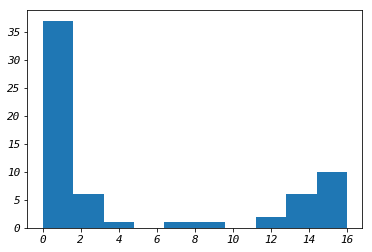

In [839]:
plt.hist(data_df.iloc[1500])

[324, 444, 315, 1501, 371, 236]
324
444
315
1501
371
236
0 0 324
0 1 444
0 2 315
0 3 1501
1 0 371
1 1 236


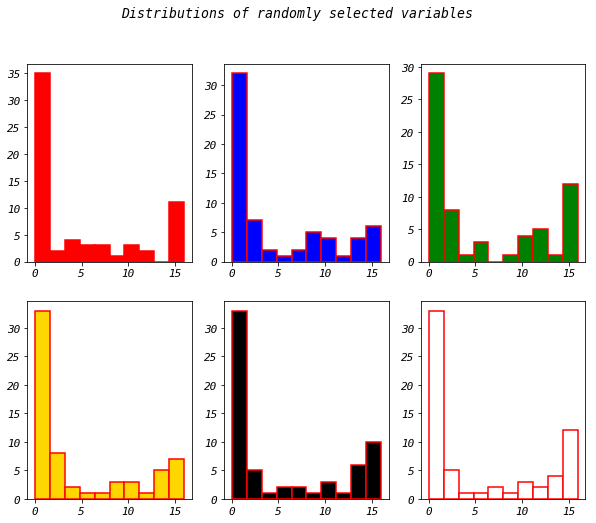

In [840]:
selection_1 = list(np.random.randint(1,1700,6))
print(selection_1)

rows_2 =    [0,0,0,1,1,1]
columns_2 = [0,1,2,0,1,2]


for z in selection_1:
    print(z)

for m,k,d in zip(rows, columns, selection_1):
    print(m,k,d)
    
colors = ['red', 'blue', 'green', 'gold', 'black', "white"]

fig, ax = plt.subplots(2, 3, figsize=(10,8))
plt.suptitle("Distributions of randomly selected variables")

for i,n,d, e in zip(rows_2, columns_2, selection_1, colors):
    ax[i,n].hist(data_df.iloc[d], color=e, edgecolor="red", linewidth=1.5)
    
# right skewed

##### Target values

In [841]:
target_df = pd.DataFrame(digits.target)

print(target_df.shape)
print(target_df.columns)
print(target_df.head())
print(target_df.info(verbose=False))

(1797, 1)
RangeIndex(start=0, stop=1, step=1)
   0
0  0
1  1
2  2
3  3
4  4
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1797 entries, 0 to 1796
Columns: 1 entries, 0 to 0
dtypes: int32(1)
memory usage: 7.1 KB
None


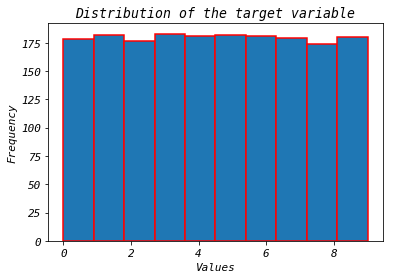

In [842]:
fig, ax1 = plt.subplots(1)
ax1.hist(target_df[0], edgecolor='red', linewidth=1.5)
ax1.set_title("Distribution of the target variable")
ax1.set_xlabel("Values")
ax1.set_ylabel("Frequency")
plt.show()
# Looks uniform

In [843]:
X = [[0], [1], [2], [3]]
>>> y = [0, 0, 1, 1]
>>> from sklearn.neighbors import KNeighborsClassifier
>>> neigh = KNeighborsClassifier(n_neighbors=3)
>>> neigh.fit(X, y) 
KNeighborsClassifier()
>>> print(neigh.predict([[1.1]]))
[0]
>>> print(neigh.predict_proba([[0.9]]))


[0]
[[0.66666667 0.33333333]]


In [844]:
def train_model(features, labels):
    X_train, 
    linear_clf = SGDRegressor(max_iter=1000, tol=1e-3)
    linear_clf.fit(features, labels)
    weights = linear_clf.coef_
    return weights

## Data modeling with the KNeighborsClassifier 

<p>
This classifier implements the K nearest neighbors vote to
determine the label of the object.
</p> 

#### Calculating the accuracy score.

In [845]:
def accuracy_knn(X, y,n):
    X_train, X_test, y_train, y_test = \
    train_test_split(X,y, test_size=0.3, random_state=42)
    knn_clf = KNeighborsClassifier(n_neighbors=n)
    knn_clf.fit(X,y)
    knn_predictions = knn_clf.predict(X_test)
    accuracy = accuracy_score(y_test, knn_predictions)
    return accuracy
    

In [846]:
accuracy_1 = \
round(accuracy_knn(data_df, np.array(target_df).ravel(), 9),5)
print(accuracy_1)

0.99259


Making specialized functions allowing for greater flexibility.

##### Doing a train-test-split

In [847]:
X_train_1, X_test_1, y_train_1, y_test_1 = \
train_test_split(data_df, target_df, test_size=0.3, random_state=42)

print(type(X_train_1))
print(type(y_train_1))
print(type([1,2,3]))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'list'>


##### Training a knn-model

In [848]:
def knn_train(X_train, y_train, n):
    # making sure a one dimensional numpy array is provided
    if isinstance(y_train, pd.DataFrame) \
    or isinstance(y_train, list):
        y_train = np.array(y_train).ravel()
    
    knn_clf = KNeighborsClassifier(n_neighbors=n)
    knn_clf.fit(X_train,y_train)
    return knn_clf

In [849]:
knn_1_5 = knn_train(X_train_1, y_train_1, n=5)
knn_1_5

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

##### Testing a knn model with a confusion matrix

In [850]:
def knn_test(knn_model, X_test):
    # input is model trained before
    knn_predictions = knn_model.predict(X_test)
    return knn_predictions

In [851]:
knn_test_1_5 = knn_test(knn_5, X_test_1)

print(type(knn_test_1_5 ))
print(knn_test_1_5.shape)
print([i for i in knn_test_1_5 [np.arange(1,500, 50)]])

<class 'numpy.ndarray'>
(540,)
[9, 1, 3, 6, 9, 6, 4, 7, 4, 2]


##### Comparing actual values / labels with predictions.

In [852]:
print(y_test_1.shape)
print(knn_test_1_5.shape)

(540, 1)
(540,)


In [853]:
dict_1 = {'Labels': y_test_1[0], 'Predictions':knn_test_5}
df_1 = pd.DataFrame(dict_1)
df_1['diff'] = df_1.Labels -  df_1.Predictions

print(df_1['diff'].sum())
print(df_1.head())

11
      Labels  Predictions  diff
1245       6            6     0
220        9            9     0
1518       3            3     0
438        7            7     0
1270       2            2     0


In [854]:
cross_1 = pd.crosstab(index=df_1.Labels, columns=df_1.Predictions)
cross_1

Predictions,0,1,2,3,4,5,6,7,8,9
Labels,,,,,,,,,,
0,53,0,0,0,0,0,0,0,0,0
1,0,50,0,0,0,0,0,0,0,0
2,0,0,47,0,0,0,0,0,0,0
3,0,0,0,54,0,0,0,0,0,0
4,0,0,0,0,60,0,0,0,0,0
5,0,0,0,0,0,65,0,0,0,1
6,0,0,0,0,0,0,53,0,0,0
7,0,0,0,0,0,0,0,55,0,0
8,0,0,0,0,0,0,0,0,43,0


In [855]:
confusion_1 = confusion_matrix(df_1.Labels, df_1.Predictions)
confusion_1

array([[53,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 50,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 47,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 54,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 60,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 65,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  0, 53,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 55,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 43,  0],
       [ 0,  0,  0,  1,  1,  1,  0,  0,  0, 56]], dtype=int64)

In [856]:
report_1 = classification_report(df_1.Labels, df_1.Predictions)
print(report_1)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        53
           1       1.00      1.00      1.00        50
           2       1.00      1.00      1.00        47
           3       0.98      1.00      0.99        54
           4       0.98      1.00      0.99        60
           5       0.98      0.98      0.98        66
           6       1.00      1.00      1.00        53
           7       1.00      1.00      1.00        55
           8       1.00      1.00      1.00        43
           9       0.98      0.95      0.97        59

   micro avg       0.99      0.99      0.99       540
   macro avg       0.99      0.99      0.99       540
weighted avg       0.99      0.99      0.99       540



<b>Testing a knn model with accuracy</b>

In [857]:
def knn_test_accuracy(knn_model, X_test, y_test):
        # input is model trained before
        knn_predictions = knn_model.predict(X_test)
        accuracy = \
        round(accuracy_score(knn_predictions,  y_test), 4)
        return accuracy

In [858]:
accuracy_2 = \
knn_test_accuracy(knn_model=knn_1_5, X_test=X_test_1, y_test=y_test_1)

print(accuracy_2)

0.9926


In [859]:
dict_2 = \
{'model' : ['knn_9', 'knn_5'], 'accuracy' : [accuracy_1, accuracy_2]}

df_2 = pd.DataFrame(dict_2)
df_2

,model,accuracy
0,knn_9,0.99259
1,knn_5,0.99260


The knn model with 5 neighbors generates a slightly better result.

<b>Conducting a cross validation</b>

In [860]:
print(target_df.shape)
print(type(target_df))

(1797, 1)
<class 'pandas.core.frame.DataFrame'>


In [861]:

def kfold_cross_validation(X_features, y_labels, n, split):
    
    fold_accuracies = []
    kf_ZZ = KFold(n_splits=split)

    for train_index_1, test_index_1 in kf_ZZ.split(data_df):
        

    
        X_train_2, X_test_2 = \
        X_features.loc[train_index_1], X_features.loc[test_index_1]
        y_train_2, y_test_2 = \
        y_labels.loc[train_index_1], y_labels.loc[test_index_1]

        knn_model = knn_train(X_train_2, y_train_2, n)
        knn_accuracy = knn_test_accuracy(knn_model, X_test_2, y_test_2)
        fold_accuracies.append(knn_accuracy)

    return fold_accuracies



In [862]:
kfold_cv_1 = \
kfold_cross_validation(X_features=data_df, y_labels=target_df, n=3, 
                       split=3)

print(kfold_1)
kfold_1_mean = round(np.mean(kfold_1), 4)
print(kfold_1_mean)

[0.9649, 0.9666, 0.9699]
0.9671


In [863]:
newrow_1 = {'model': 'kfold_cv_1' , 'accuracy': kfold_1_mean}

df_2 = df_2.append(newrow_1, ignore_index=True)
df_2

,model,accuracy
0,knn_9,0.99259
1,knn_5,0.99260
2,kfold_cv_1,0.96710


The average accuracy of the kfold knn model with 3 splits and 3 neighbors
is not better than that of the other models. However keep in mind that
cross validation is not only done for generating good predictions but
also to make predictions more stable depending on the train-test-split.

In [864]:

splits_n = [2,3,4,5,6, 7, 8, 9]


mean_accuracies_cv = []

for i in splits_n:
    acc_list = \
    kfold_cross_validation(X_features=data_df,
                           y_labels=target_df, 
                           n=i,
                           split=i)
    average = round(np.mean(acc_list),4)
    mean_accuracies_cv.append(average)

    

In [865]:
print(mean_accuracies_cv)
dict_3 = \
{'splits / knn': splits_n, 'mean_accuracy': mean_accuracies_cv}

df_3 = pd.DataFrame(dict_3)
df_3

[0.9527, 0.9671, 0.965, 0.9644, 0.9672, 0.9594, 0.9616, 0.9611]


,splits / knn,mean_accuracy
0,2,0.9527
1,3,0.9671
2,4,0.9650
3,5,0.9644
4,6,0.9672
5,7,0.9594
6,8,0.9616
7,9,0.9611


In [866]:
newrow_22 = {'model': 'kfold_cv_splits_3' , 'accuracy': 0.9671}

df_2 = df_2.append(newrow_22, ignore_index=True)
df_2

,model,accuracy
0,knn_9,0.99259
1,knn_5,0.99260
2,kfold_cv_1,0.96710
3,kfold_cv_splits_3,0.96710


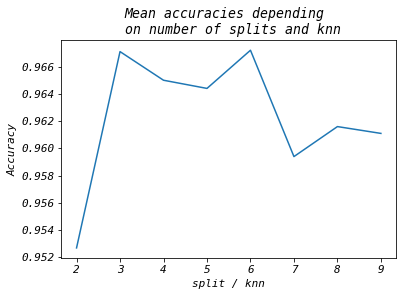

In [867]:
fig, ax1 = plt.subplots(1)
ax1.plot(splits_n, mean_accuracies_cv)
ax1.set_title("Mean accuracies depending \n on number of splits and knn")
ax1.set_ylabel("Accuracy")
ax1.set_xlabel("split / knn")
plt.show()

In [868]:
list(np.arange(2,11, 1))

[2, 3, 4, 5, 6, 7, 8, 9, 10]

In [869]:

splits = [2,3,4,5]
n_list = [np.arange(2,11, 1)]

mean_accuracies_cv_2 = []

for s, n in zip(splits, n_list):
    print(s,n)
    

2 [ 2  3  4  5  6  7  8  9 10]


In [870]:
mean_accuracies_cv_2 = []

for n in splits_n :
    acc_list = kfold_cross_validation(X_features=data_df,
                           y_labels=target_df, 
                           n=n,
                           split=9)
    average = round(np.mean(acc_list),4)
    mean_accuracies_cv_2.append(average)

In [871]:
mean_accuracies_cv_2 

[0.9705, 0.9744, 0.9705, 0.9705, 0.9677, 0.965, 0.9638, 0.9611]

In [872]:
dict_4 = \
{'splits / knn': splits_n, 'mean_accuracy': mean_accuracies_cv}

df_4 = pd.DataFrame(dict_4)
df_4

,splits / knn,mean_accuracy
0,2,0.9527
1,3,0.9671
2,4,0.9650
3,5,0.9644
4,6,0.9672
5,7,0.9594
6,8,0.9616
7,9,0.9611


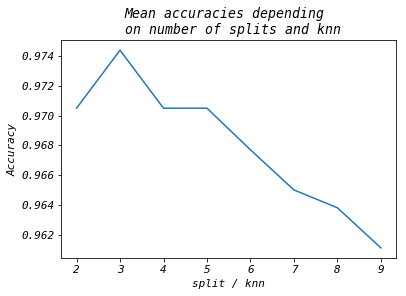

In [873]:
fig, ax1 = plt.subplots(1)
ax1.plot(splits_n, mean_accuracies_cv_2 )
ax1.set_title("Mean accuracies depending \n on number of splits and knn")
ax1.set_ylabel("Accuracy")
ax1.set_xlabel("split / knn")
plt.show()

In [874]:
newrow_22 = {'model': 'kfold_cv_splits_9' , 'accuracy': 0.9611}

df_2 = df_2.append(newrow_22, ignore_index=True)
df_2

,model,accuracy
0,knn_9,0.99259
1,knn_5,0.99260
2,kfold_cv_1,0.96710
3,kfold_cv_splits_3,0.96710
4,kfold_cv_splits_9,0.96110


## Data modeling with the neural network MLPClassifier

Creating a function which returns accuracies for the 
train test data sets of every fold in the cross validation
splits and then calculating the averages.

In [875]:
def cv_mlpclf(X_features, y_label, splits, nodes, hidden,
              activation='relu'):
# The relu function is set as default because in general
# it produces the best results.

    train_fold_acc = []
    test_fold_acc = []

    kf = KFold(n_splits=splits)
    for train_index, test_index in kf.split(X_features):
        X_train, X_test = \
        X_features.loc[train_index], X_features.loc[test_index]
        y_train, y_test = \
        y_label.loc[train_index], y_label.loc[test_index]
        
        # making sure a one dimensional numpy array is provided
        if isinstance(y_train, pd.DataFrame) \
        or isinstance(y_train, list):
            y_train = np.array(y_train).ravel()
        
        mlp = \
        MLPClassifier(hidden_layer_sizes=(nodes, hidden), 
                      max_iter=10000)
        mlp.fit(X_train, y_train )
        
        
        mlp_predictions = mlp.predict(X_test)
        accuracy_test = \
        round(accuracy_score(y_test, mlp_predictions), 4)
        test_fold_acc.append(accuracy_test)
        mean_test_acc = \
        round(np.mean(test_fold_acc), 4)
    
        
        mlp_predictions = mlp.predict(X_train)
        accuracy_train = \
        round(accuracy_score(y_train, mlp_predictions), 4)       
        train_fold_acc.append(accuracy_train)
        mean_train_acc = \
        round(np.mean(train_fold_acc), 4)
    
    return (train_fold_acc, mean_train_acc,
            test_fold_acc, mean_test_acc)  

#### Neural network 1 of MLPClassifier: 100 nodes, 3 hidden layer.

In [876]:
train_fold_acc_1, mean_train_acc_1, \
test_fold_acc_1, mean_test_acc_1 = \
cv_mlpclf(X_features=data_df, y_label=target_df, 
          splits=3, nodes=100, hidden=3)

print("Fold train accuracies: {}".format(train_fold_acc_1))
print("Overall train average accuracy: {}".format(mean_train_acc_1))

print("Fold test accuracies: {}".format(test_fold_acc_1))
print("Overall test average accuracy: {}".format(mean_test_acc_1))


Fold train accuracies: [0.404, 0.899, 1.0]
Overall train average accuracy: 0.7677
Fold test accuracies: [0.3673, 0.8047, 0.8715]
Overall test average accuracy: 0.6812


The overall test average is rather low.

In [877]:
newrow_33 = {'model': 'MLP_100_3_hidden' , 'accuracy': 0.6216}

df_2 = df_2.append(newrow_33, ignore_index=True)
df_2

,model,accuracy
0,knn_9,0.99259
1,knn_5,0.99260
2,kfold_cv_1,0.96710
3,kfold_cv_splits_3,0.96710
4,kfold_cv_splits_9,0.96110
5,MLP_100_3_hidden,0.62160


<b>Overfitting?</b>


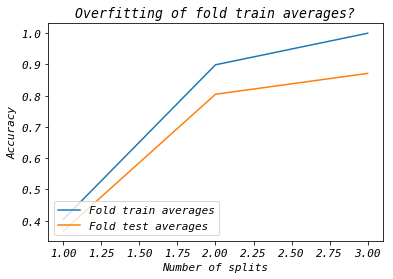

In [878]:
fig, ax1 = plt.subplots(1)
ax1.plot([1,2,3], train_fold_acc_1, label="Fold train averages")
ax1.plot([1,2,3], test_fold_acc_1, label="Fold test averages")
ax1.legend(loc="lower left")
ax1.set_title("Overfitting of fold train averages?")
ax1.set_xlabel("Number of splits")
ax1.set_ylabel("Accuracy")
plt.show()

There is overfitting in the training model while accuracy is
rather low.

#### Neural network 2 of MLPClassifier: nodes between 8 and 256, 3 hidden layers.

<p>Creating models with different 
number of nodes in the hidden layer sizes parameter.</p> 

In [879]:
# list of input values for hidden layer size nodes
nodes_list = list(np.linspace(8,256,6, dtype='int'))
print(layers_list)

[8, 57, 107, 156, 206, 256]


In [880]:
acc_fold_train = []
acc_mean_train = []

acc_fold_test = []
acc_mean_test = []

for nodes in nodes_list:
    # 4 output values, test & train for every fold and mean
    train_fold, train_mean, test_fold, test_mean = \
    cv_mlpclf(X_features=data_df, y_label=target_df, 
              splits=3, nodes=nodes, hidden=3)
    
    acc_fold_train.append(train_fold)
    acc_mean_train.append(train_mean)
    
    acc_fold_test.append(test_fold)
    acc_mean_test.append(test_mean)

In [881]:
print("Fold train accuracies: " , acc_fold_train)
print("Overall train averages for number of nodes: ", 
      acc_mean_train)

Fold train accuracies:  [[0.9992, 0.9725, 1.0], [0.8088, 0.101, 0.9942], [0.9224, 1.0, 0.4416], [0.8932, 0.4048, 0.3957], [0.3264, 0.4883, 0.9983], [0.4015, 0.4499, 0.4399]]
Overall train averages for number of nodes:  [0.9906, 0.6347, 0.788, 0.5646, 0.6043, 0.4304]


In [882]:
print("Fold test accuracies: " , acc_fold_test)
print("Overall test averages for number of nodes: ", 
      acc_mean_test)

Fold test accuracies:  [[0.8681, 0.793, 0.8264], [0.6344, 0.0952, 0.8881], [0.7012, 0.8982, 0.3539], [0.7062, 0.3639, 0.3189], [0.3456, 0.3606, 0.8664], [0.3573, 0.3907, 0.3856]]
Overall test averages for number of nodes:  [0.8292, 0.5392, 0.6511, 0.463, 0.5242, 0.3779]


In [883]:
newrow_44 = {'model': 'MLP_100_8_nodes' , 'accuracy': 0.8197}

df_2 = df_2.append(newrow_44, ignore_index=True)
df_2

,model,accuracy
0,knn_9,0.99259
1,knn_5,0.99260
2,kfold_cv_1,0.96710
3,kfold_cv_splits_3,0.96710
4,kfold_cv_splits_9,0.96110
5,MLP_100_3_hidden,0.62160
6,MLP_100_8_nodes,0.81970


<b>Overfitting?</b>


In [884]:
dict_5 = \
{'n nodes': layers_list, 
 'overall test accuracy': acc_mean_test,
 'overall train accuracy': acc_mean_train}

df_5 = pd.DataFrame(dict_5)
df_5['difference'] = \
df_5['overall test accuracy'] - df_5['overall train accuracy']

df_5

,n nodes,overall test accuracy,overall train accuracy,difference
0,8,0.8292,0.9906,-0.1614
1,57,0.5392,0.6347,-0.0955
2,107,0.6511,0.7880,-0.1369
3,156,0.4630,0.5646,-0.1016
4,206,0.5242,0.6043,-0.0801
5,256,0.3779,0.4304,-0.0525


There is overfitting in the training model.

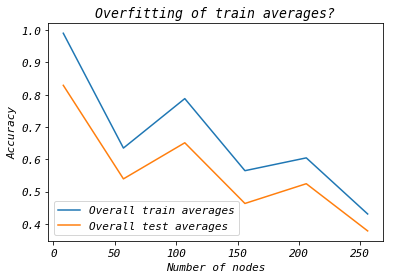

In [885]:
fig, ax1 = plt.subplots(1)
ax1.plot(layers_list, acc_mean_train, label="Overall train averages")
ax1.plot(layers_list, acc_mean_test, label="Overall test averages")
ax1.legend(loc="lower left")
ax1.set_title("Overfitting of train averages?")
ax1.set_xlabel("Number of nodes")
ax1.set_ylabel("Accuracy")
plt.show()

It seems the number of nodes of 156 produces the best
test accuracy. Is varying the number of hidden layer while 
holding the number of nodes constant on 156 nodes going to 
generate a higher accuracy?

#### Neural network 3 of MLPClassifier: nodes 57, hidden layers between 1 and 100.

In [886]:
acc_fold_train_2 = []
acc_mean_train_2 = []

acc_fold_test_2 = []
acc_mean_test_2 = []

hidden_layers_list = [1,3,10,30,50,70,100]

for hl in hidden_layers_list:

    train_fold, train_mean, test_fold, test_mean = \
    cv_mlpclf(X_features=data_df, y_label=target_df, 
              splits=3, nodes=57, hidden=hl)
    
    acc_fold_train_2.append(train_fold)
    acc_mean_train_2.append(train_mean)
    
    acc_fold_test_2.append(test_fold)
    acc_mean_test_2.append(test_mean)

In [887]:
print(acc_fold_train_2)


[[0.5033, 0.1027, 0.5551], [0.9967, 0.9967, 0.7913], [1.0, 1.0, 1.0], [1.0, 1.0, 1.0], [1.0, 1.0, 1.0], [1.0, 1.0, 1.0], [1.0, 1.0, 1.0]]


In [888]:
print(acc_mean_train_2)


[0.387, 0.9282, 1.0, 1.0, 1.0, 1.0, 1.0]


In [889]:
print(acc_fold_test_2)


[[0.4207, 0.1002, 0.394], [0.8681, 0.8631, 0.6477], [0.8848, 0.9232, 0.9149], [0.9349, 0.9549, 0.9199], [0.9299, 0.9583, 0.9399], [0.9249, 0.9366, 0.9215], [0.9282, 0.9399, 0.9366]]


In [890]:
print(acc_mean_test_2)

[0.305, 0.793, 0.9076, 0.9366, 0.9427, 0.9277, 0.9349]


In [891]:
dict_6 = \
{'n hidden layers': hidden_layers_list , 
 'mean train accuracies': acc_mean_train_2,
 'mean test accuracies': acc_mean_test_2 }

df_6 = pd.DataFrame(dict_6)
df_6['difference'] = \
df_6['mean train accuracies'] - df_6['mean test accuracies']

df_6

,n hidden layers,mean train accuracies,mean test accuracies,difference
0,1,0.3870,0.3050,0.0820
1,3,0.9282,0.7930,0.1352
2,10,1.0000,0.9076,0.0924
3,30,1.0000,0.9366,0.0634
4,50,1.0000,0.9427,0.0573
5,70,1.0000,0.9277,0.0723
6,100,1.0000,0.9349,0.0651


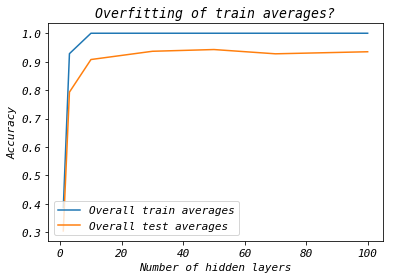

In [892]:
fig, ax1 = plt.subplots(1)
ax1.plot(hidden_layers_list, acc_mean_train_2, label="Overall train averages")
ax1.plot(hidden_layers_list, acc_mean_test_2, label="Overall test averages")
ax1.legend(loc="lower left")
ax1.set_title("Overfitting of train averages?")
ax1.set_xlabel("Number of hidden layers")
ax1.set_ylabel("Accuracy")
plt.show()

In [893]:
newrow_55 = {'model': 'MLP_100_hidden_70_nodes' , 'accuracy': 0.9371}

df_2 = df_2.append(newrow_55, ignore_index=True)
df_2

,model,accuracy
0,knn_9,0.99259
1,knn_5,0.99260
2,kfold_cv_1,0.96710
3,kfold_cv_splits_3,0.96710
4,kfold_cv_splits_9,0.96110
5,MLP_100_3_hidden,0.62160
6,MLP_100_8_nodes,0.81970
7,MLP_100_hidden_70_nodes,0.93710


Increasing the number of splits can reduce overfitting.

In [ ]:
acc_fold_train_3 = []
acc_mean_train_3 = []

acc_fold_test_3 = []
acc_mean_test_3 = []

nodes_list_3 = [10,64,128]
hidden_layers_list_3 = [100, 150, 200]

for hl, nodes in zip(hidden_layers_list_3, nodes_list_3) :
    
    train_fold, train_mean, test_fold, test_mean = \
    cv_mlpclf(X_features=data_df, y_label=target_df, 
              splits=6, nodes=nodes, hidden=hl)
    
    acc_fold_train_3.append(train_fold)
    acc_mean_train_3.append(train_mean)
    
    acc_fold_test_3.append(test_fold)
    acc_mean_test_3.append(test_mean)



In [ ]:
print(acc_fold_train_3)
print(acc_fold_test_3)

[[1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0]]
[[0.9567, 0.9267, 0.94, 0.9699, 0.9498, 0.8662], [0.9533, 0.94, 0.9533, 0.9732, 0.9766, 0.9197], [0.9367, 0.9567, 0.94, 0.9699, 0.9866, 0.9331]]


In [ ]:
dict_7 = \
{'n_nodes': nodes_list_3,
 'n hidden layers': [100, 150, 200], 
 'mean train accuracies': acc_mean_train_3,
 'mean test accuracies': acc_mean_test_3 }

df_7 = pd.DataFrame(dict_7)
df_7['difference'] = \
df_7['mean train accuracies'] - df_7['mean test accuracies']

df_7

,n_nodes,n hidden layers,mean train accuracies,mean test accuracies,difference
0,10,100,1.0,0.9349,0.0651
1,64,150,1.0,0.9527,0.0473
2,128,200,1.0,0.9538,0.0462


In [ ]:
acc_fold_train_4 = []
acc_mean_train_4 = []

acc_fold_test_4 = []
acc_mean_test_4 = []

nodes_list_4 = [10,64,128]

for nodes in nodes_list_4:
    
    train_fold, train_mean, test_fold, test_mean = \
    cv_mlpclf(X_features=data_df, y_label=target_df, 
              splits=6, nodes=nodes, hidden=100)
    
    acc_fold_train_4.append(train_fold)
    acc_mean_train_4.append(train_mean)
    
    acc_fold_test_4.append(test_fold)
    acc_mean_test_4.append(test_mean)




In [ ]:
print(acc_fold_train_3)
print(acc_fold_test_3)

[[1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0]]
[[0.9567, 0.9267, 0.94, 0.9699, 0.9498, 0.8662], [0.9533, 0.94, 0.9533, 0.9732, 0.9766, 0.9197], [0.9367, 0.9567, 0.94, 0.9699, 0.9866, 0.9331]]


In [ ]:
dict_8 = \
{'n_nodes': nodes_list_4,
 'n hidden layers': [100, 150, 200], 
 'mean train accuracies': acc_mean_train_4,
 'mean test accuracies': acc_mean_test_4 }

df_8 = pd.DataFrame(dict_8)
df_8['difference'] = \
df_8['mean train accuracies'] - df_8['mean test accuracies']

df_8

,n_nodes,n hidden layers,mean train accuracies,mean test accuracies,difference
0,10,100,1.0,0.9226,0.0774
1,64,150,1.0,0.9605,0.0395
2,128,200,1.0,0.9577,0.0423


In [ ]:
newrow_66 = {'model': 'MLP_200_hidden_128_nodes' , 'accuracy': 0.9599}

df_2 = df_2.append(newrow_66, ignore_index=True)
df_2

,model,accuracy
0,knn_9,0.99259
1,knn_5,0.99260
2,kfold_cv_1,0.96710
3,kfold_cv_splits_3,0.96710
4,kfold_cv_splits_9,0.96110
5,MLP_100_3_hidden,0.62160
6,MLP_100_8_nodes,0.81970
7,MLP_100_hidden_70_nodes,0.93710
8,MLP_200_hidden_128_nodes,0.95990


### Scaling

<p>
Following the documentation on 
<a href="https://scikit-learn.org/stable/modules/neural_networks_supervised.html">
Neural network models</a> Scaling is highly recommended:
</p> 
<p>The Multi-layer Perceptron is sensitive to feature scaling, so it is highly recommended to scale your data. 
For example, scale each attribute on the input vector 
X to [0, 1] or [-1, +1], or standardize it to have 
mean 0 and variance 1. Note that you must apply the same scaling to the test set for meaningful results. 
You can use StandardScaler for standardization.</p> 



In [ ]:
def cv_mlp_scaler(X_features, y_label, splits, nodes, hidden,
                  activation='relu'):

    train_fold_acc = []
    test_fold_acc = []

    kf = KFold(n_splits=splits)
    for train_index, test_index in kf.split(X_features):
        X_train, X_test = \
        X_features.loc[train_index], X_features.loc[test_index]
        y_train, y_test = \
        y_label.loc[train_index], y_label.loc[test_index]
        
        # making sure a one dimensional numpy array is provided
        if isinstance(y_train, pd.DataFrame) \
        or isinstance(y_train, list):
            y_train = np.array(y_train).ravel()
            
        # making the standard scaler available
        scaler = StandardScaler()
        # fit scaler to the splitted data
        scaler.fit(X_train) 
        X_train = scaler.transform(X_train) 
        # apply same transformation to test data
        scaler.fit(X_test)
        X_test = scaler.transform(X_test)  
        
        
        mlp = \
        MLPClassifier(hidden_layer_sizes=(nodes, hidden), 
                      max_iter=10000)
        mlp.fit(X_train, y_train )
        
        
        mlp_predictions = mlp.predict(X_test)
        accuracy_test = \
        round(accuracy_score(y_test, mlp_predictions), 4)
        test_fold_acc.append(accuracy_test)
        mean_test_acc = \
        round(np.mean(test_fold_acc), 4)
    
        
        mlp_predictions = mlp.predict(X_train)
        accuracy_train = \
        round(accuracy_score(y_train, mlp_predictions), 4)       
        train_fold_acc.append(accuracy_train)
        mean_train_acc = \
        round(np.mean(train_fold_acc), 4)
    
    return (train_fold_acc, mean_train_acc,
            test_fold_acc, mean_test_acc)  

In [ ]:
acc_fold_train_5 = []
acc_mean_train_5 = []

acc_fold_test_5 = []
acc_mean_test_5 = []

nodes_list_5 = [10,65,128]
hidden_layers_list_5 = [100, 150, 200]

for hl, nodes in zip(hidden_layers_list_5, nodes_list_5) :
    
    train_fold, train_mean, test_fold, test_mean = \
    cv_mlp_scaler(X_features=data_df, y_label=target_df, 
                  splits=6, nodes=nodes, hidden=hl)
    
    acc_fold_train_5.append(train_fold)
    acc_mean_train_5.append(train_mean)
    
    acc_fold_test_5.append(test_fold)
    acc_mean_test_5.append(test_mean)

In [ ]:
print(acc_fold_train_5)
print(acc_fold_test_5)

[[1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0]]
[[0.93, 0.9433, 0.91, 0.9465, 0.9732, 0.9064], [0.95, 0.9667, 0.9533, 0.9732, 0.9799, 0.9231], [0.95, 0.9667, 0.94, 0.9799, 0.9933, 0.9197]]


In [ ]:
dict_9 = \
{'n_nodes': nodes_list_5,
 'n hidden layers': hidden_layers_list_5, 
 'mean train accuracies': acc_mean_train_5 ,
 'mean test accuracies': acc_mean_test_5}

df_9 = pd.DataFrame(dict_9)
df_9['difference'] = \
df_9['mean train accuracies'] - df_9['mean test accuracies']

df_9

,n_nodes,n hidden layers,mean train accuracies,mean test accuracies,difference
0,10,100,1.0,0.9349,0.0651
1,65,150,1.0,0.9577,0.0423
2,128,200,1.0,0.9583,0.0417


Scaling resulted not immediately in better outputs. 
Scaling is of course depending on the distribution of the data.

In [ ]:
newrow_77 = {'model': 'MLP_200_hidden_128_nodes_scaled' , 'accuracy': 0.9566}

df_2 = df_2.append(newrow_77, ignore_index=True)
df_2

,model,accuracy
0,knn_9,0.99259
1,knn_5,0.99260
2,kfold_cv_1,0.96710
3,kfold_cv_splits_3,0.96710
4,kfold_cv_splits_9,0.96110
5,MLP_100_3_hidden,0.62160
6,MLP_100_8_nodes,0.81970
7,MLP_100_hidden_70_nodes,0.93710
8,MLP_200_hidden_128_nodes,0.95990
9,MLP_200_hidden_128_nodes_scaled,0.95660


## Data modeling with Support vector machines
<p>
Support vector machines are now applied to recognize hand-written digits. Here a base model is developed. Further hyper
parameter tuning is not conducted. Further approaches are to
to be found directly on
<a href="https://scikit-learn.org/stable/auto_examples/classification/plot_digits_classification.html#sphx-glr-auto-examples-classification-plot-digits-classification-py">scikit learn</a>. 
</p> 

In [ ]:
def cv_svm_scaler(X_features, y_label, splits):

    train_fold_acc = []
    test_fold_acc = []

    kf = KFold(n_splits=splits)
    for train_index, test_index in kf.split(X_features):
        X_train, X_test = \
        X_features.loc[train_index], X_features.loc[test_index]
        y_train, y_test = \
        y_label.loc[train_index], y_label.loc[test_index]
        
        # making sure a one dimensional numpy array is provided
        if isinstance(y_train, pd.DataFrame) \
        or isinstance(y_train, list):
            y_train = np.array(y_train).ravel()
            
        # making the standard scaler available
        scaler = StandardScaler()
        # fit scaler to the splitted data
        scaler.fit(X_train) 
        X_train = scaler.transform(X_train) 
        # apply same transformation to test data
        scaler.fit(X_test)
        X_test = scaler.transform(X_test)  
        
        
        svm_clf = svm.SVC(gamma=0.001)
        
        svm_clf.fit(X_train, y_train )
        
        
        svm_predictions = svm_clf.predict(X_test)
        accuracy_test = \
        round(accuracy_score(y_test, svm_predictions), 4)
        test_fold_acc.append(accuracy_test)
        mean_test_acc = \
        round(np.mean(test_fold_acc), 4)
    
        
        svm_predictions = svm_clf.predict(X_train)
        accuracy_train = \
        round(accuracy_score(y_train, svm_predictions), 4)       
        train_fold_acc.append(accuracy_train)
        mean_train_acc = \
        round(np.mean(train_fold_acc), 4)
    
    return (train_fold_acc, mean_train_acc,
            test_fold_acc, mean_test_acc)

In [ ]:
train_fold_svm, train_mean_svm, test_fold_svm, test_mean_svm = \
cv_svm_scaler(X_features=data_df, y_label=target_df, splits=6)

In [ ]:
print(train_fold_svm)
print(train_mean_svm)
print(test_fold_svm)
print(test_mean_svm)

In [ ]:
newrow_88 = {'model': 'svm_scaled_1' , 'accuracy': 0.936}

df_2 = df_2.append(newrow_88, ignore_index=True)
df_2

The accuracy is with 0.93600 not better than in other models.
However this is only the beginning of investigating the 
opportunities of support vector machines, which is not 
conducted here as stated above.

### Conclusion

<p>The simple knn models perform best. This is not unexpected
because of using a simple train test split, which make
distortions in the modeling process possible due to chance in 
the assignment of the data to the train-test groups. 
Cross validation reduces the variability in the outcome and
makes predictions more stable. Overall the accuracies of some
models remain high anyway. </p> 

<p>Concerning the neural networks increasing hidden layers and nodes results in better outputs like the research
is telling.</p> 


<p>Of course further hyperparameter tuning can 
be done and also other algorithms like support vector
machines can be applied.</p> 
